<a href="https://colab.research.google.com/github/evany24/Stroke-Prediction/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 2**<br>
Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.

To meet the requirements for this week you must have:

Deleted unnecessary columns.
Deleted duplicate rows.
Identified and addressed missing values.
Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
Produced univariate visuals for the target and all features.
Identified outliers.
Clearly commented all of your cleaning steps and described any decisions you made.
Commit your file to your Github repository and submit the link below. 

#Stroke Dataset

## About the Dataset

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information
- 1) id: unique identifier
- 2) gender: "Male", "Female" or "Other"
- 3) age: age of the patient
- 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- 6) ever_married: "No" or "Yes"
- 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- 8) Residence_type: "Rural" or "Urban"
- 9) avg_glucose_level: average glucose level in blood
- 10) bmi: body mass index
- 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
 - *Note: "Unknown" in smoking_status means that the information is unavailable for this patient
- 12) stroke: 1 if the patient had a stroke or 0 if not


*   Source: Kaggle Stroke Prediction Dataset
*   Data: [Stroke Prediction CSV](https://github.com/evany24/Stroke-Prediction/blob/main/healthcare-dataset-stroke-data.csv)



**Target:** Stroke or no stroke

**What does one row represent?** A person

**Is this a classification or regression problem?** Classification

In [1]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load data
df_stroke = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**How many features does the data have? How many rows?**

In [3]:
#display rows and columns
df_stroke.shape
print(f'There are {df_stroke.shape[0]} rows and {df_stroke.shape[1]} columns')
print(f'The {df_stroke.shape[0]} rows represent the data values of the features and target.\nThe columns represent {df_stroke.shape[1]-1} features and the target stroke.')

There are 5110 rows and 12 columns
The 5110 rows represent the data values of the features and target.
The columns represent 11 features and the target stroke.


In [4]:
#target column numbers
df_stroke['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [5]:
#missing values
df_stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
#duplicates
df_stroke.duplicated().sum()

0

**What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?** 
- There weight for the target column is highly favorable to the 0 or no stroke. This will present a challenge to try and balance the data to get the best model to predict a stroke. We will also have to deal with the missing values in the bmi column.

## Clean Data

### Delete unnecessary columns


id is unnecessary to keep for our purposes, there are too many unique values

In [7]:
# drop id column
df_stroke.drop(['id'], axis=1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


- The id column has been removed

### **Inspect Column Datatypes for Errors**

In [8]:
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
## Display column names and datatypes
df_stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

- The datatypes for each column match the data dictionary

### **Inspect Column Names for Errors**

In [10]:
## Display column names
df_stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

- We will rename 'Residence_type' to 'residence_type' to match the other column names.


In [11]:
#rename Residence_type column
df_stroke.rename(columns = {'Residence_type':'residence_type'}, inplace = True)

In [12]:
#check changes
df_stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

- All column types are now consistent

### **Inspect Values for Errors**

#### **Numeric Columns**

In [13]:
# View the numberic statistics for columns contain numberical values
df_stroke.describe(include="number")

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- .80 seems like a low value for age but let's look into it

Locate rows with age values equal to .80

In [14]:
# display rows with age equal to .08
df_stroke[df_stroke['age'] == .08]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


Check other age values to see if there are similar low values

In [15]:
# create a filter for age being less than 1
stroke_age = df_stroke['age'] < 1
df_stroke[stroke_age]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,22706,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
564,61511,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
982,54747,Male,0.88,0,0,No,children,Rural,157.57,19.2,Unknown,0
996,53279,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,66772,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown,0
1206,68908,Female,0.72,0,0,No,children,Urban,66.36,23.0,Unknown,0
1317,30084,Male,0.80,0,0,No,children,Rural,98.67,17.5,Unknown,0
1600,40544,Male,0.40,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


- There are many rows where age values less than 1. We now know that this is not inconsistent numerical data.

**All the numerical data is consistent**

#### Categorical Columns

In [16]:
#Display object columns
dtypes = df_stroke.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['gender', 'ever_married', 'work_type', 'residence_type',
       'smoking_status'],
      dtype='object')

In [17]:
#Display values for object columns
for col in str_cols:
    print(f"- Column= {col}")
    print(df_stroke[col].value_counts(dropna=False))
    print('\n\n')

- Column= gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64



- Column= ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64



- Column= work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64



- Column= residence_type
Urban    2596
Rural    2514
Name: residence_type, dtype: int64



- Column= smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64





Let us change the naming convention for 'work type' so that all values start with a capital letter

In [18]:
# change children to Children
df_stroke['work_type'].replace({'children':'Children'}, inplace=True)
df_stroke['work_type'].value_counts()

Private          2925
Self-employed     819
Children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Change the naming convention for 'smoking_status' values to start with a capital letter and use an underscore for spaces.

In [19]:
# change never smoked to Never_smoked, formerly smoked to Formerly_smoked and smokes to Smokes
df_stroke['smoking_status'].replace({'never smoked':'Never_smoked', 'formerly smoked':'Formerly_smoked', 'smokes':'Smokes'}, inplace=True)
df_stroke['smoking_status'].value_counts()

Never_smoked       1892
Unknown            1544
Formerly_smoked     885
Smokes              789
Name: smoking_status, dtype: int64

Recheck object columns

In [20]:
#Display values for object columns
for col in str_cols:
    print(f"- Column= {col}")
    print(df_stroke[col].value_counts(dropna=False))
    print('\n\n')

- Column= gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64



- Column= ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64



- Column= work_type
Private          2925
Self-employed     819
Children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64



- Column= residence_type
Urban    2596
Rural    2514
Name: residence_type, dtype: int64



- Column= smoking_status
Never_smoked       1892
Unknown            1544
Formerly_smoked     885
Smokes              789
Name: smoking_status, dtype: int64





- Categorical values are now consistent

### Check for duplicate rows

In [21]:
#check for duplicates
df_stroke.duplicated().sum()

0

- There are no duplicate values

In [22]:
#missing values
df_stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

- There are 201 missing values in the bmi column, we will impute these values with SimpleImputer after splitting the data to avoid data leakage. We will most likely use the mean or median because the data is a float value and not an integer.

### Check for missing values

In [23]:
# numeric columns
df_stroke.describe(include="number")

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Exploratory Data Analysis

#### Numerical Columns

##### **Age**

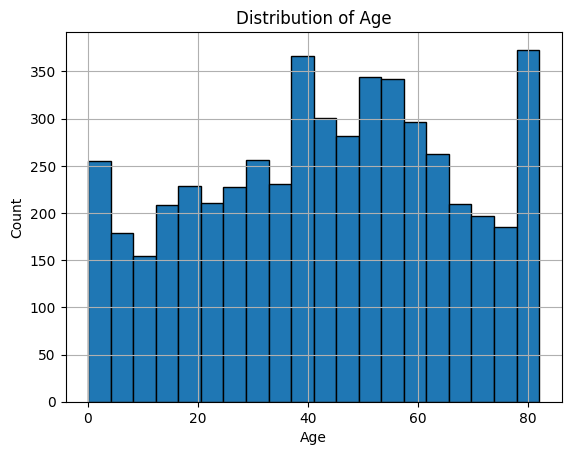

In [24]:
# Histogram of Age
ax = df_stroke['age'].hist(bins = 'auto', edgecolor = 'black')
ax.tick_params(axis='x')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Age')
ax.set_xlabel('Age')
ax.set_ylabel('Count');

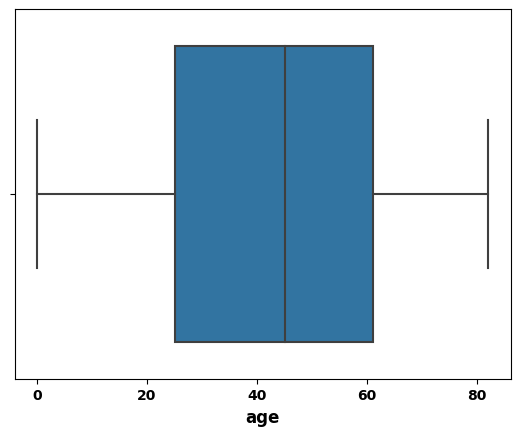

In [25]:
# seaborn box plot for avg_glucose_level
ax = sns.boxplot(data = df_stroke,
                 x = 'age')
ax.set_xlabel('age', fontsize=12, weight='bold')
plt.xticks(fontsize=10, weight='bold');

- Age is pretty evenly distributed and doesn't show any major outliers

##### **Hypertension**

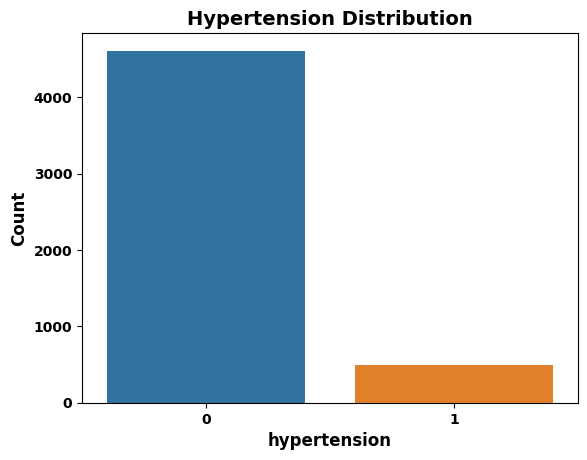

In [26]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='hypertension')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('hypertension', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Set Title
ax.set_title('Hypertension Distribution', fontsize = 14, weight = 'bold');

- This is a binary column so it only has values of 0 and 1

##### Heart Disease

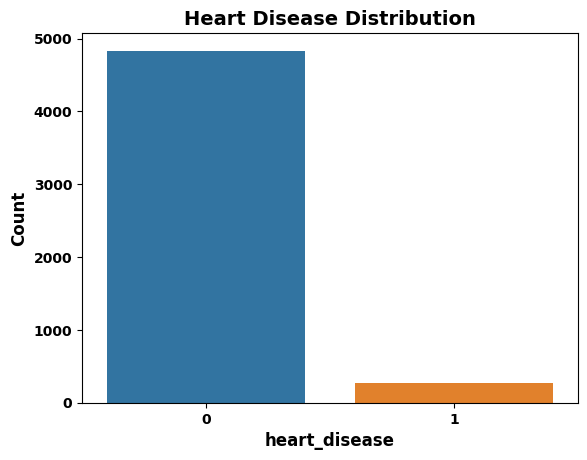

In [27]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='heart_disease')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('heart_disease', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Set Title
ax.set_title('Heart Disease Distribution', fontsize = 14, weight = 'bold');

- This is a binary column so it only has values of 0 and 1

##### **Avg Glucose Level**

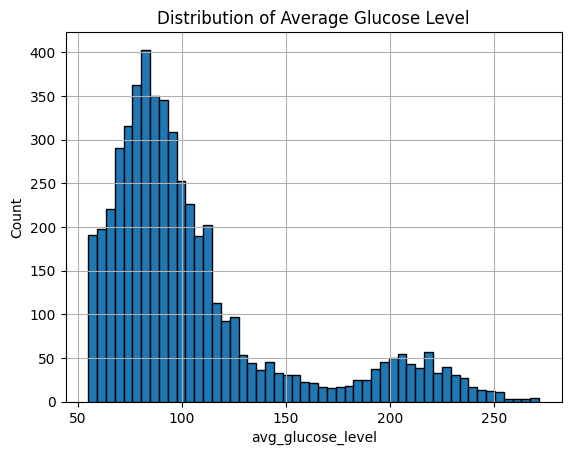

In [28]:
# Histogram of avg_glucose_level
ax = df_stroke['avg_glucose_level'].hist(bins = 'auto', edgecolor = 'black')
ax.tick_params(axis='x')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Average Glucose Level')
ax.set_xlabel('avg_glucose_level')
ax.set_ylabel('Count');

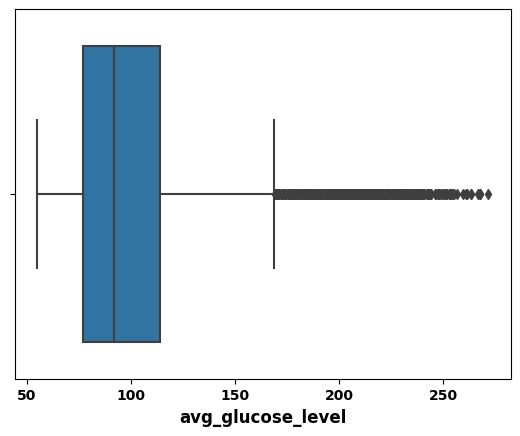

In [29]:
# seaborn box plot for avg_glucose_level
ax = sns.boxplot(data = df_stroke,
                 x = 'avg_glucose_level')
ax.set_xlabel('avg_glucose_level', fontsize=12, weight='bold')
plt.xticks(fontsize=10, weight='bold');

- The distribution of avg glucose level is between around 50 and 165. There are many outliers above the 165/170 values.

##### **BMI**

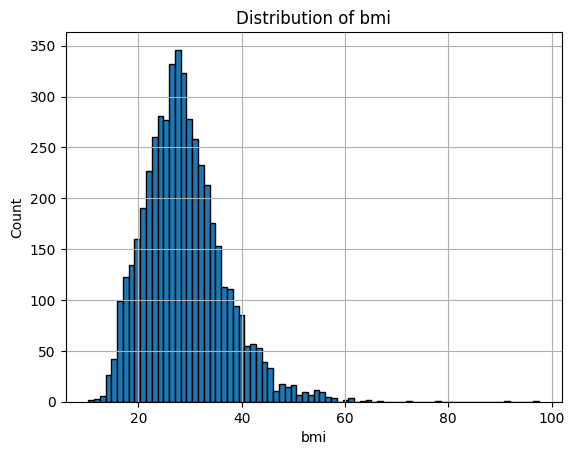

In [30]:
# Histogram of bmi
ax = df_stroke['bmi'].hist(bins = 'auto', edgecolor = 'black')
ax.tick_params(axis='x')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of bmi')
ax.set_xlabel('bmi')
ax.set_ylabel('Count');

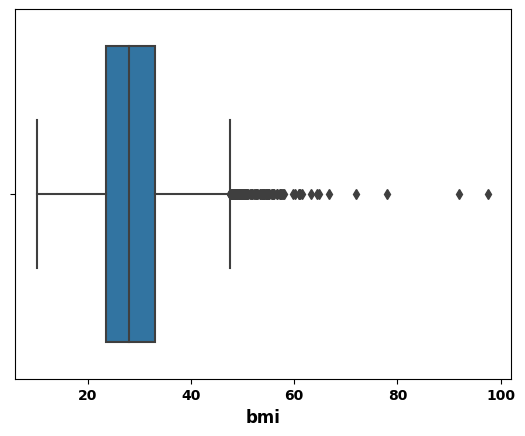

In [31]:
# seaborn box plot for BMI
ax = sns.boxplot(data = df_stroke,
                 x = 'bmi')
ax.set_xlabel('bmi', fontsize=12, weight='bold')
plt.xticks(fontsize=10, weight='bold');

-The distribution of bmi is relatively balanced over the 10 to 60 values. There are very low values or outliers as you approach values over 50.

##### **Stroke 'Target'**

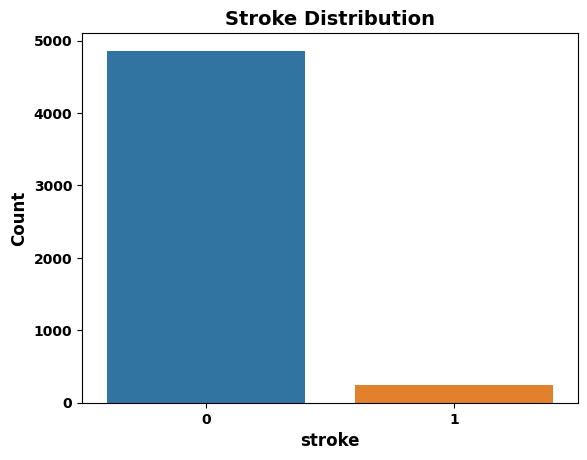

In [32]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='stroke')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('stroke', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Set Title
ax.set_title('Stroke Distribution', fontsize = 14, weight = 'bold');

- We can see that the target that we are trying to predict is unbalanced in favor of 1 which the patient having a stroke. We will have to account for this imbalance in our models

#### Categorical Columns

##### **Gender**

In [33]:
df_stroke['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

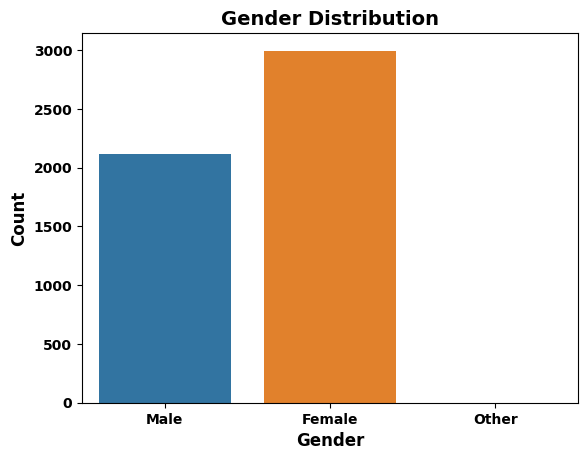

In [34]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='gender')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('Gender', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Set Title
ax.set_title('Gender Distribution', fontsize = 14, weight = 'bold');          

##### **Ever Married**

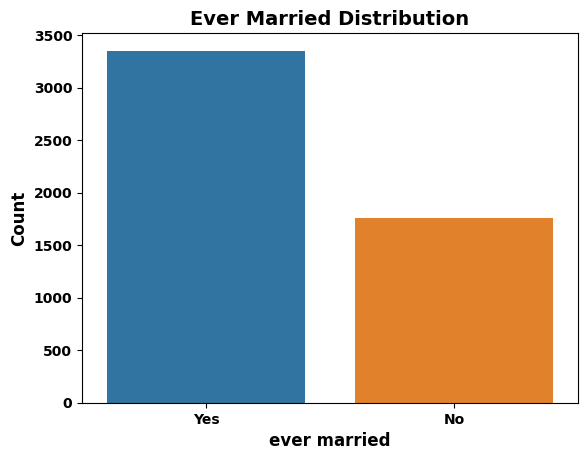

In [35]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='ever_married')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('ever married', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Set Title
ax.set_title('Ever Married Distribution', fontsize = 14, weight = 'bold');  

##### **Work Type**

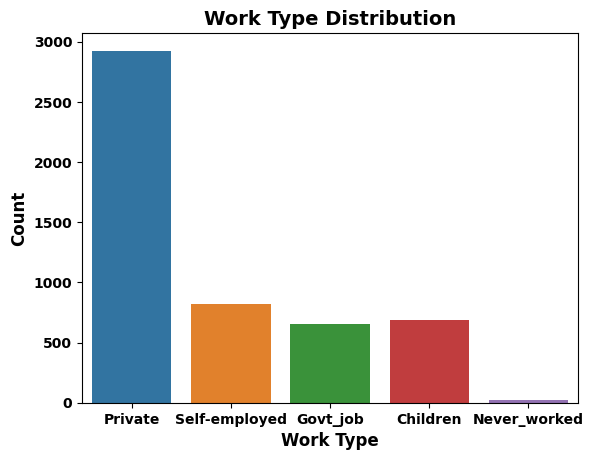

In [36]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='work_type')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('Work Type', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Set Title
ax.set_title('Work Type Distribution', fontsize = 14, weight = 'bold');  

##### **Residence Type**

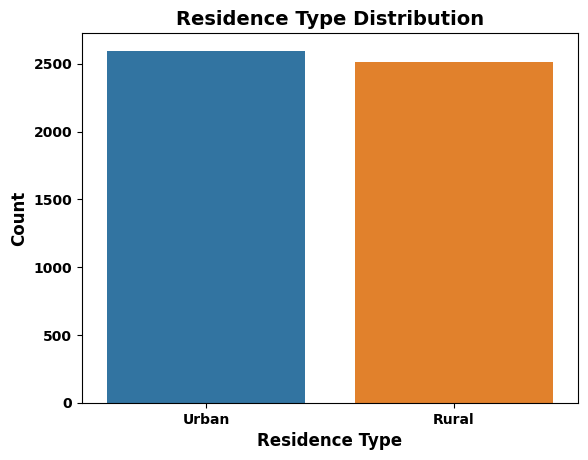

In [37]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='residence_type')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('Residence Type', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Set Title
ax.set_title('Residence Type Distribution', fontsize = 14, weight = 'bold');  

##### **Smoking Status**

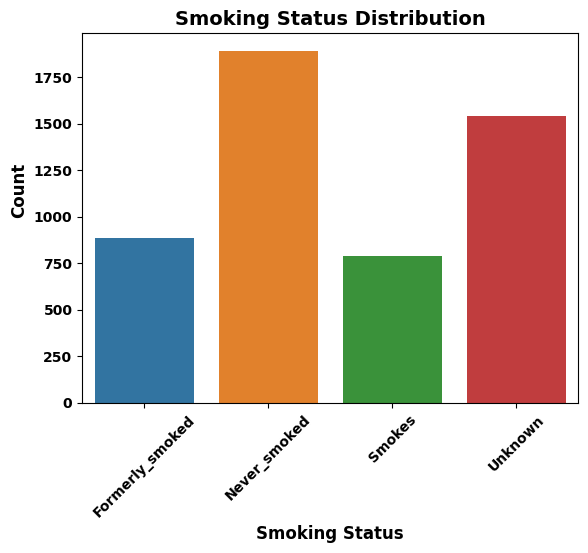

In [38]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='smoking_status')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('Smoking Status', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold', ha='left')
plt.xticks(fontsize=10, weight='bold', rotation = 45)
# Set Title
ax.set_title('Smoking Status Distribution', fontsize = 14, weight = 'bold');  

#**Second Choice Dataset**

## About the second choice dataset

Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism. The following data contains the information collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984. A description of the clinical background for the trial and the covariates recorded here is in Chapter 0, especially Section 0.2 of Fleming and Harrington, Counting
Processes and Survival Analysis, Wiley, 1991. A more extended discussion can be found in Dickson, et al., Hepatology 10:1-7 (1989) and in Markus, et al., N Eng J of Med 320:1709-13 (1989).

A total of 424 PBC patients, referred to Mayo Clinic during that ten-year interval, met eligibility criteria for the randomized placebo-controlled trial of the drug D-penicillamine. The first 312 cases in the dataset participated in the randomized trial and contain largely complete data. The additional 112 cases did not participate in the clinical trial but consented to have basic measurements recorded and to be followed for survival. Six of those cases were lost to follow-up shortly after diagnosis, so the data here are on an additional 106 cases as well as the 312 randomized participants.

Attribute Information
- 1) ID: unique identifier
- 2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
- 3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
- 4) Drug: type of drug D-penicillamine or placebo
- 5) Age: age in [days]
- 6) Sex: M (male) or F (female)
- 7) Ascites: presence of ascites N (No) or Y (Yes)
- 8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
- 9) Spiders: presence of spiders N (No) or Y (Yes)
- 10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
- 11) Bilirubin: serum bilirubin in [mg/dl]
- 12) Cholesterol: serum cholesterol in [mg/dl]
- 13) Albumin: albumin in [gm/dl]
- 14) Copper: urine copper in [ug/day]
- 15) Alk_Phos: alkaline phosphatase in [U/liter]
- 16) SGOT: SGOT in [U/ml]
- 17) Triglycerides: triglicerides in [mg/dl]
- 18) Platelets: platelets per cubic [ml/1000]
- 19) Prothrombin: prothrombin time in seconds [s]
- 20) Stage: histologic stage of disease (1, 2, 3, or 4)

*   Source: Kaggle Cirrhosis Prediction Dataset
*   Data: [Cirrhosis Prediction CSV](https://github.com/evany24/Stroke-Prediction/blob/main/cirrhosis.csv)

**Target:** Stage: histologic stage of disease (1, 2, 3, or 4)

**What does one row represent?** A person

**Is this a classification or regression problem?** Classification

In [39]:
#load data
df_liver = pd.read_csv('/content/drive/MyDrive/cirrhosis.csv')
df_liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

**How many features does the data have? How many rows?**

In [40]:
#display rows and columns
df_liver.shape
print(f'There are {df_liver.shape[0]} rows and {df_liver.shape[1]} columns')
print(f'The {df_liver.shape[0]} rows represent the data values of the features and target.\nThe columns represent {df_liver.shape[1]-1} features and the target stage.')

There are 418 rows and 20 columns
The 418 rows represent the data values of the features and target.
The columns represent 19 features and the target stage.


In [41]:
#target column numbers
df_liver['Stage'].value_counts()

3.0    155
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64

In [42]:
#missing values
df_liver.isna().sum().sum()

1033

In [43]:
#missing values
df_liver.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [44]:
#duplicates
df_liver.duplicated().sum()

0

**What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?** 
- A lot of the columns have missing values so we will need to find the best approach in dealing with the missing values. We may have to drop some columns but hopefully we are able to impute values using the best possible techniques. If we use best practices for dealing with missing values we will be able to create a model to predict the target stage of the disease.